### 신생아 이름
- 1880년 부터 현재까지 가장 빈도가 높은 신생아 이름에 대한 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names = ['names', 'sex', 'births'])
names1880.head()

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


- 성별 이름 개수

In [3]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

### 
### 파일 일괄 불러온 후 결합

In [4]:
years = range(1880, 2022)

In [5]:
pieces = []
columns = ['names', 'sex', 'births']

In [6]:
for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [7]:
names = pd.concat(pieces, ignore_index = True)

In [8]:
print(names.shape)
names.tail()

(2052781, 4)


,names,sex,births,year
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021
2052780,Zyn,M,5,2021


### 
### 연도, 성별에 따른 데이터 수집

In [9]:
import matplotlib.pyplot as plt

In [10]:
total_births = names.pivot_table('births', index = 'year',
                                 columns = 'sex', aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248
2021,1627098,1734277


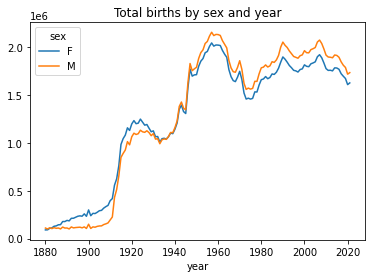

In [11]:
total_births.plot(title = 'Total births by sex and year')
plt.show()

### 
### 각 이름이 전체 출생수에서 차지하는 비율 계산
- **prop 값이 0.02fkaus 100명의 아기 중 2명의 이름이 같다는 뜻**

In [12]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


#### 새너티테스트 : 모든 그룹에서 prop 열의 합이 1이 맞는지 확인

In [13]:
names.groupby(['year', 'sex']).prop.sum().tail()

year  sex
2019  M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: prop, dtype: float64

### 
### 각 연도 / 성별에 따른 선호하는 이름 1000개 추출 

In [14]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

In [15]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True, drop = True)

In [16]:
top1000.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


- 함수를 정의하지 않고, 직접 추출 시

In [17]:
pieces = [] 
for year, group in names.groupby(['year', 'sex']): 
    pieces.append(group.sort_values(by = 'births', ascending = False)[:1000]) 
    top1000 = pd.concat(pieces, ignore_index = True)

In [18]:
top1000.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### 
### 이름 유행 분석

In [19]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [20]:
a1 = top1000.groupby(['names', 'year'], as_index = False).sum()
a2 = a1[['names', 'year', 'births']]
a2.head()

,names,year,births
0,Aaden,2008,957
1,Aaden,2009,1268
2,Aaden,2010,450
3,Aaden,2011,275
4,Aaden,2012,224


In [43]:
total_births = top1000.pivot_table('births', index='year',
                                   columns = 'names',
                                   aggfunc = sum)

In [44]:
total_births.head()

names,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN


In [45]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1880 to 2021
Columns: 7276 entries, Aaden to Zyon
dtypes: float64(7276)
memory usage: 7.9 MB


In [47]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

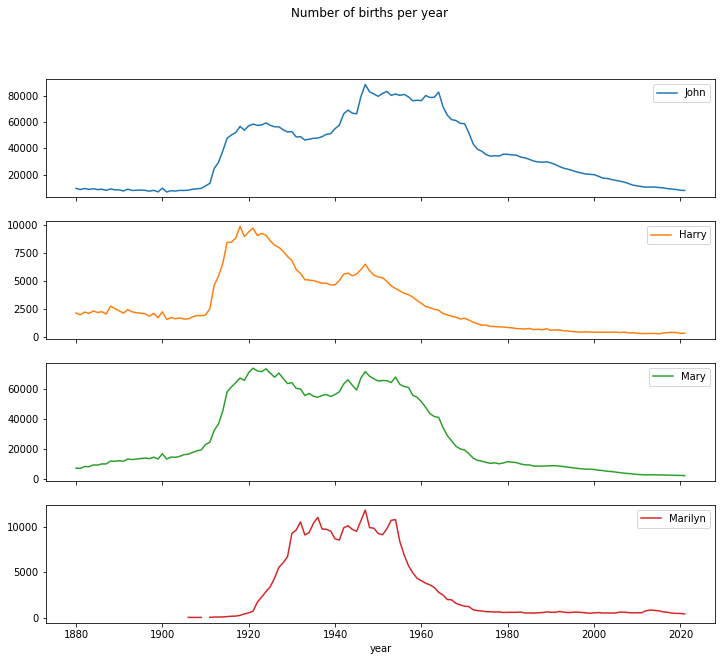

In [48]:
subset.plot(subplots = True, figsize = (12, 10), 
            grid = False,
            title="Number of births per year")
plt.show()

### 
### 다양한 이름을 사용하는 경향 측정

In [39]:
table = top1000.pivot_table('prop', index = 'year',
                            columns = 'sex', aggfunc = sum)

In [50]:
table.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


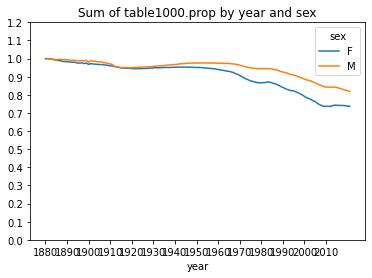

In [49]:
table.plot(title='Sum of table1000.prop by year and sex',
           yticks = np.linspace(0, 1.2, 13), 
           xticks = range(1880, 2022, 10))

plt.show()

- 이름의 다양성이 증가
- 상위 1000개의 이름에서 비율의 총합이 감소

#### 
#### 인기 있는 이름순으로 정렬

In [52]:
df = boys[boys.year == 2010]
df.head()

,names,sex,births,year,prop
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897


- prop을 내림차순으로 정렬하고, 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 탐색

In [53]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum.head()

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
Name: prop, dtype: float64

### ```.searchsorted(p)``` : 누계가 p가 되는 위치 반환
- 배열의 인덱스는 0부터 시작하기 때문에 결과에 1을 더함

In [55]:
prop_cumsum.values.searchsorted(0.5) + 1

117

- **1900년에는 이보다 더 낮음 => 이름의 다양성이 증가했음을 의미** 

In [56]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

- 위의 과정을 함수로 생성

In [57]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [59]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


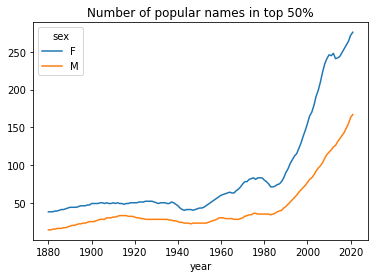

In [61]:
diversity.plot(title="Number of popular names in top 50%")
plt.show()

- 여자의 이름이 항상 남자의 이름보다 더 다양
- 시간이 지날수록 양 성별 이름의 다양성 모두 증가

### 
### 마지막 글자의 변화

In [70]:
names.head()

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [86]:
# names 열에서 마지막 글자를 추출
get_last_letter = lambda x: x[-1]
last_letters = names.names.map(get_last_letter)
last_letters.names = 'last_letter'

In [87]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: names, dtype: object

- 전체 기간 중 세 지점을 골라 이름의 마지막 글자 몇 개를 출력

In [88]:
table = names.pivot_table('births', index = last_letters,
                          columns = ['sex', 'year'], aggfunc = sum)

ㅡ 성별 / 연도별 마지막 글자의 개수

In [89]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex           F                            M                    
year       1910      1960      2010     1910      1960      2010
names                                                           
a      108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b           NaN     694.0     455.0    411.0    3910.0   39298.0
c           5.0      49.0     957.0    482.0   15456.0   23360.0
d        6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e      133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [90]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

- **전체 출생수에서 성별별로 각각의 마지막 글자가 차지하는 비율을 계산하기 위해, 전체 출생수로 정규화**

In [91]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex           F                             M                    
year       1910      1960      2010      1910      1960      2010
names                                                            
a      0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b           NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c      0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d      0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e      0.336947  0.215138  0.178424  0.147599  0.083838  0.067969

#### 
#### 이름의 마지막 글자 비율로 성별과 출생 연도에 대한 막대그래프 생성

In [92]:
import matplotlib.pyplot as plt

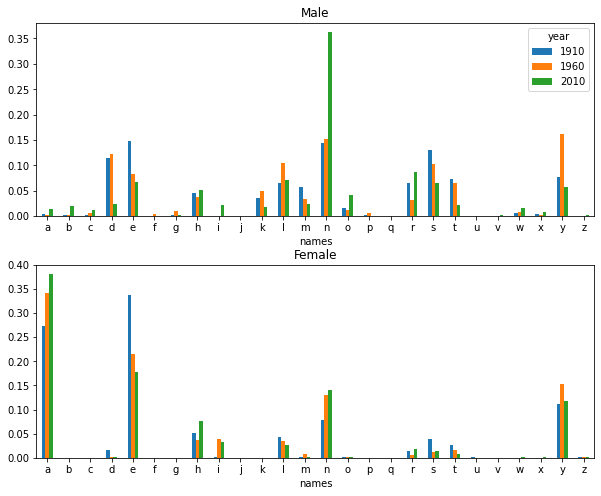

In [94]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female',
                      legend = False)

plt.subplots_adjust(hspace=0.25)
plt.show()

- **'n'으로 끝나는 남자 이름의 빈도가 1960년도 이후에 급격히 증가**

### 
### d / n / y 로 끝나는 이름을 가진 남자의 연도별 출생 비율
- **1910, 1960, 2010년의 지점이 아닌 전체 자료에 대해 출생연도와 성별, 남자아이 이름에서 몇 가지 글자로 정규화하고 시계열 데이터로 변환**

In [95]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

names,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


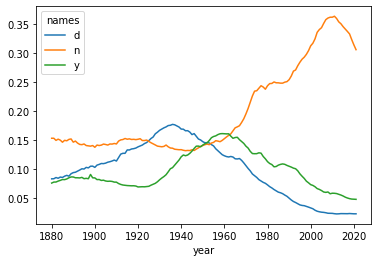

In [97]:
dny_ts.plot()
plt.show()

### 
### 남자 이름과 여자 이름이 바뀐 경우
- 예전에는 남자 이름으로 선호되다, 현재는 여자 이름으로 선호되는 경우

In [100]:
all_names = pd.Series(top1000.names.unique())
all_names.head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
dtype: object

#### 'lesl'로 시작하는 이름

In [101]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

#### 'lesl'로 시작하는 이름들의 수, 상대도수

In [104]:
filtered = top1000[top1000.names.isin(lesley_like)]
filtered.groupby('names').births.sum()

names
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: births, dtype: int64

#### 성별과 연도별로 모은 다음 출생연도로 정규화

In [112]:
table = filtered.pivot_table('births', 
                             index = 'year',
                             columns = 'sex', 
                             aggfunc = 'sum')

table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [115]:
table = table.div(table.sum(1), axis = 'index')
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


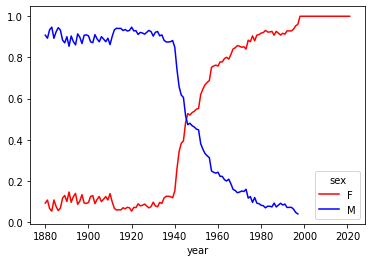

In [114]:
table.plot(style = {'M': 'b-', 'F': 'r-'})
plt.show()